__Import the required libraries__

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling as pp
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import os

__Step 1: Import the data to the data frame__

In [51]:
credit_df = pd.read_csv('german_credit.csv')

# EDA

In [52]:
credit_df.shape

(1000, 17)

__Step 2: Let us get the feel of the data and identify if any challenges and uncertainities in the data__

__check if there are any missing values in the data using isna and isnull methods__

In [53]:
credit_df.isna().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [54]:
credit_df.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

__we can see from above that there is no missing data in any of the features of the data set__

In [55]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_duration     1000 non-null object
percent_of_income       1000 non-null int64
years_at_residence      1000 non-null int64
age                     1000 non-null int64
other_credit            1000 non-null object
housing                 1000 non-null object
existing_loans_count    1000 non-null int64
job                     1000 non-null object
dependents              1000 non-null int64
phone                   1000 non-null object
default                 1000 non-null object
dtypes: int64(7), object(10)
memory usage: 132.9+ KB


__if we see the above information, most of the features/columns are of type Object.Decision tree can work on numericals and categorical values, but not on the object types.__

__so, the immediate step for us is to convert the object type to categorical values using the pandas.categorical method__

In [56]:
#run the loop, get the type of the column and if it is object convert it to categorical

columns = credit_df.columns
for col in columns:
    if(credit_df[col].dtype =='object'):
        credit_df[col] = pd.Categorical(credit_df[col]).codes
    

In [57]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
checking_balance        1000 non-null int8
months_loan_duration    1000 non-null int64
credit_history          1000 non-null int8
purpose                 1000 non-null int8
amount                  1000 non-null int64
savings_balance         1000 non-null int8
employment_duration     1000 non-null int8
percent_of_income       1000 non-null int64
years_at_residence      1000 non-null int64
age                     1000 non-null int64
other_credit            1000 non-null int8
housing                 1000 non-null int8
existing_loans_count    1000 non-null int64
job                     1000 non-null int8
dependents              1000 non-null int64
phone                   1000 non-null int8
default                 1000 non-null int8
dtypes: int64(7), int8(10)
memory usage: 64.5 KB


__so all the object type columns are converted to the numerical types__

__let us check some random data using the sample method. The tail and head method gives the data in the order as present where as sample will pick the random data and display it__

In [58]:
credit_df.sample(5)

checking_balance  months_loan_duration  credit_history  purpose  amount  \
307                 1                    12               1        4     727   
151                 3                    10               1        4    1924   
354                 3                    10               1        3     727   
257                 1                    12               4        4    2149   
70                  3                    36               1        1    8133   

     savings_balance  employment_duration  percent_of_income  \
307                0                    2                  4   
151                2                    0                  1   
354                1                    3                  4   
257                2                    0                  4   
70                 2                    0                  1   

     years_at_residence  age  other_credit  housing  existing_loans_count  \
307                   3   33             1        1                     1   
151                   4   38             1        1                     1   
354                   4   46             1        0                     1   
257                   1   29             1        0                     1   
70                    2   30             0        1                     1   

     job  dependents  phone  default  
307    3           1      1        1  
151    1           1      1        0  
354    1           1      1        0  
257    1           1      0        1  
70     1           1      0        0

In [59]:
credit_df.head(5)

checking_balance  months_loan_duration  credit_history  purpose  amount  \
0                 1                     6               0        4    1169   
1                 0                    48               1        4    5951   
2                 3                    12               0        3    2096   
3                 1                    42               1        4    7882   
4                 1                    24               3        1    4870   

   savings_balance  employment_duration  percent_of_income  \
0                4                    3                  4   
1                2                    0                  2   
2                2                    1                  2   
3                2                    1                  2   
4                2                    0                  3   

   years_at_residence  age  other_credit  housing  existing_loans_count  job  \
0                   4   67             1        1                     2    1   
1                   2   22             1        1                     1    1   
2                   3   49             1        1                     1    3   
3                   4   45             1        0                     1    1   
4                   4   53             1        0                     2    1   

   dependents  phone  default  
0           1      1        0  
1           1      0        1  
2           2      0        0  
3           2      0        0  
4           2      0        1

In [60]:
credit_df.tail(5)

checking_balance  months_loan_duration  credit_history  purpose  amount  \
995                 3                    12               1        4    1736   
996                 1                    30               1        1    3857   
997                 3                    12               1        4     804   
998                 1                    45               1        4    1845   
999                 0                    45               0        1    4576   

     savings_balance  employment_duration  percent_of_income  \
995                2                    1                  3   
996                2                    0                  4   
997                2                    3                  4   
998                2                    0                  4   
999                0                    4                  3   

     years_at_residence  age  other_credit  housing  existing_loans_count  \
995                   4   31             1        1                     1   
996                   4   40             1        1                     1   
997                   4   38             1        1                     1   
998                   4   23             1        0                     1   
999                   4   27             1        1                     1   

     job  dependents  phone  default  
995    3           1      0        0  
996    0           1      1        0  
997    1           1      0        0  
998    1           1      1        1  
999    1           1      0        0

__describe() method helps to get more information on the columns/features of the dataset, their mean, min, max, percentiles, count etc as shown below__

In [61]:
credit_df.describe()

checking_balance  months_loan_duration  credit_history      purpose  \
count       1000.000000           1000.000000      1000.00000  1000.000000   
mean           1.582000             20.903000         1.07000     2.540000   
std            1.253334             12.058814         1.05935     1.607789   
min            0.000000              4.000000         0.00000     0.000000   
25%            0.000000             12.000000         0.00000     1.000000   
50%            1.000000             18.000000         1.00000     3.000000   
75%            3.000000             24.000000         1.00000     4.000000   
max            3.000000             72.000000         4.00000     5.000000   

             amount  savings_balance  employment_duration  percent_of_income  \
count   1000.000000        1000.0000          1000.000000        1000.000000   
mean    3271.258000           2.1450             1.525000           2.973000   
std     2822.736876           1.1114             1.344315           1.118715   
min      250.000000           0.0000             0.000000           1.000000   
25%     1365.500000           2.0000             0.000000           2.000000   
50%     2319.500000           2.0000             1.000000           3.000000   
75%     3972.250000           2.0000             3.000000           4.000000   
max    18424.000000           4.0000             4.000000           4.000000   

       years_at_residence          age  other_credit      housing  \
count         1000.000000  1000.000000   1000.000000  1000.000000   
mean             2.845000    35.546000      0.908000     1.071000   
std              1.103718    11.375469      0.421561     0.531264   
min              1.000000    19.000000      0.000000     0.000000   
25%              2.000000    27.000000      1.000000     1.000000   
50%              3.000000    33.000000      1.000000     1.000000   
75%              4.000000    42.000000      1.000000     1.000000   
max              4.000000    75.000000      2.000000     2.000000   

       existing_loans_count          job   dependents        phone  \
count           1000.000000  1000.000000  1000.000000  1000.000000   
mean               1.407000     1.274000     1.155000     0.404000   
std                0.577654     0.946478     0.362086     0.490943   
min                1.000000     0.000000     1.000000     0.000000   
25%                1.000000     1.000000     1.000000     0.000000   
50%                1.000000     1.000000     1.000000     0.000000   
75%                2.000000     1.000000     1.000000     1.000000   
max                4.000000     3.000000     2.000000     1.000000   

           default  
count  1000.000000  
mean      0.300000  
std       0.458487  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

__correlation using corr() method, explains the correlation between the features. Features can be postively & highly corelated(value close to one) or high negative value indicates they are inversely and higly correlated__

In [62]:
credit_df.corr()

checking_balance  months_loan_duration  credit_history  \
checking_balance              1.000000             -0.096005       -0.155113   
months_loan_duration         -0.096005              1.000000        0.148239   
credit_history               -0.155113              0.148239        1.000000   
purpose                       0.029666             -0.128694       -0.094504   
amount                       -0.092638              0.624984        0.109598   
savings_balance               0.097452              0.020843       -0.073245   
employment_duration          -0.030032              0.003824       -0.053245   
percent_of_income             0.029780              0.074749       -0.016986   
years_at_residence            0.008835              0.034067       -0.031805   
age                           0.083636             -0.036136       -0.057085   
other_credit                  0.052184              0.003559       -0.066258   
housing                      -0.012511             -0.157049       -0.015954   
existing_loans_count          0.084513             -0.011284       -0.177467   
job                          -0.029085             -0.215438       -0.009165   
dependents                    0.030417             -0.023834        0.057804   
phone                         0.037208              0.164718       -0.004388   
default                      -0.302406              0.214927        0.193730   

                       purpose    amount  savings_balance  \
checking_balance      0.029666 -0.092638         0.097452   
months_loan_duration -0.128694  0.624984         0.020843   
credit_history       -0.094504  0.109598        -0.073245   
purpose               1.000000 -0.210375        -0.001288   
amount               -0.210375  1.000000         0.070127   
savings_balance      -0.001288  0.070127         1.000000   
employment_duration  -0.027556  0.038756         0.056865   
percent_of_income     0.108289 -0.271316         0.032940   
years_at_residence   -0.049809  0.028926         0.038741   
age                  -0.097851  0.032716         0.094760   
other_credit          0.060079 -0.020224         0.000726   
housing               0.055853 -0.135632        -0.032711   
existing_loans_count -0.081676  0.020795         0.015568   
job                   0.047388 -0.261139        -0.040662   
dependents           -0.116408  0.017142         0.023693   
phone                -0.135896  0.276995         0.075988   
default              -0.055675  0.154739        -0.103133   

                      employment_duration  percent_of_income  \
checking_balance                -0.030032           0.029780   
months_loan_duration             0.003824           0.074749   
credit_history                  -0.053245          -0.016986   
purpose                         -0.027556           0.108289   
amount                           0.038756          -0.271316   
savings_balance                  0.056865           0.032940   
employment_duration              1.000000           0.074664   
percent_of_income                0.074664           1.000000   
years_at_residence               0.218838           0.049302   
age                              0.289741           0.058266   
other_credit                    -0.052460           0.041423   
housing                         -0.126529          -0.089405   
existing_loans_count             0.085495           0.021669   
job                             -0.142279          -0.078090   
dependents                       0.028019          -0.071207   
phone                            0.110568           0.014413   
default                          0.008932           0.072404   

                      years_at_residence       age  other_credit   housing  \
checking_balance                0.008835  0.083636      0.052184 -0.012511   
months_loan_duration            0.034067 -0.036136      0.003559 -0.157049   
credit_history                 -0.031805 -0.057085     -0.066258 -0.015954   
purpose          

__The correlation can also be viewed in the form of heatmap, shown below. The intensity of the color explains the correlation.  In the following black indicates highly negative correlatuiion, and as the color intensity decreases the correlation increases__

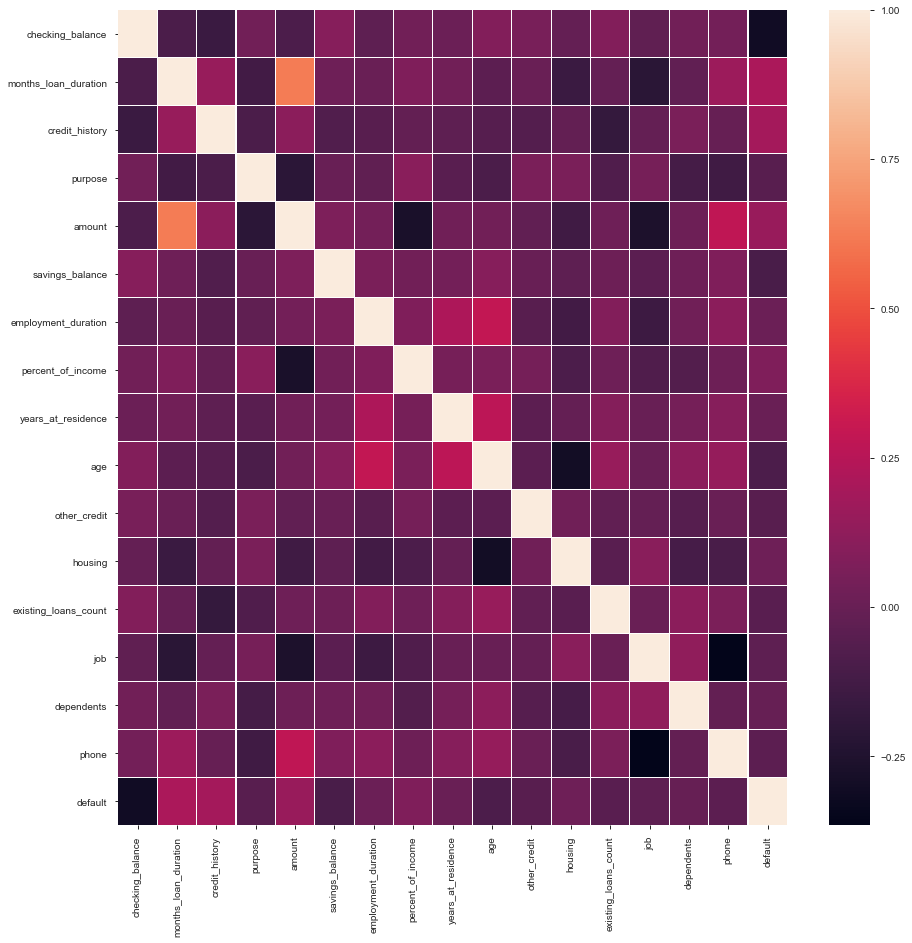

In [63]:
plt.figure(figsize=(15,15))
sns.heatmap(credit_df.corr(), linewidths=0.1, )

# Pandas Profiling

__Pandas profiling eases the way of doing the EDA and generates the exhausitve reports and also the distribution information of each feature as shown in the following__

In [64]:
pp.ProfileReport(credit_df)

# visualization

Seaborn and matplot lib are widely used to do the visualization part of the data.

# Univariate Analysis

__Univariate analysis is the very simple form of analyzing the data and it doesn't give information about correlation with other features__

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2a8887b8>,
      dtype=object)

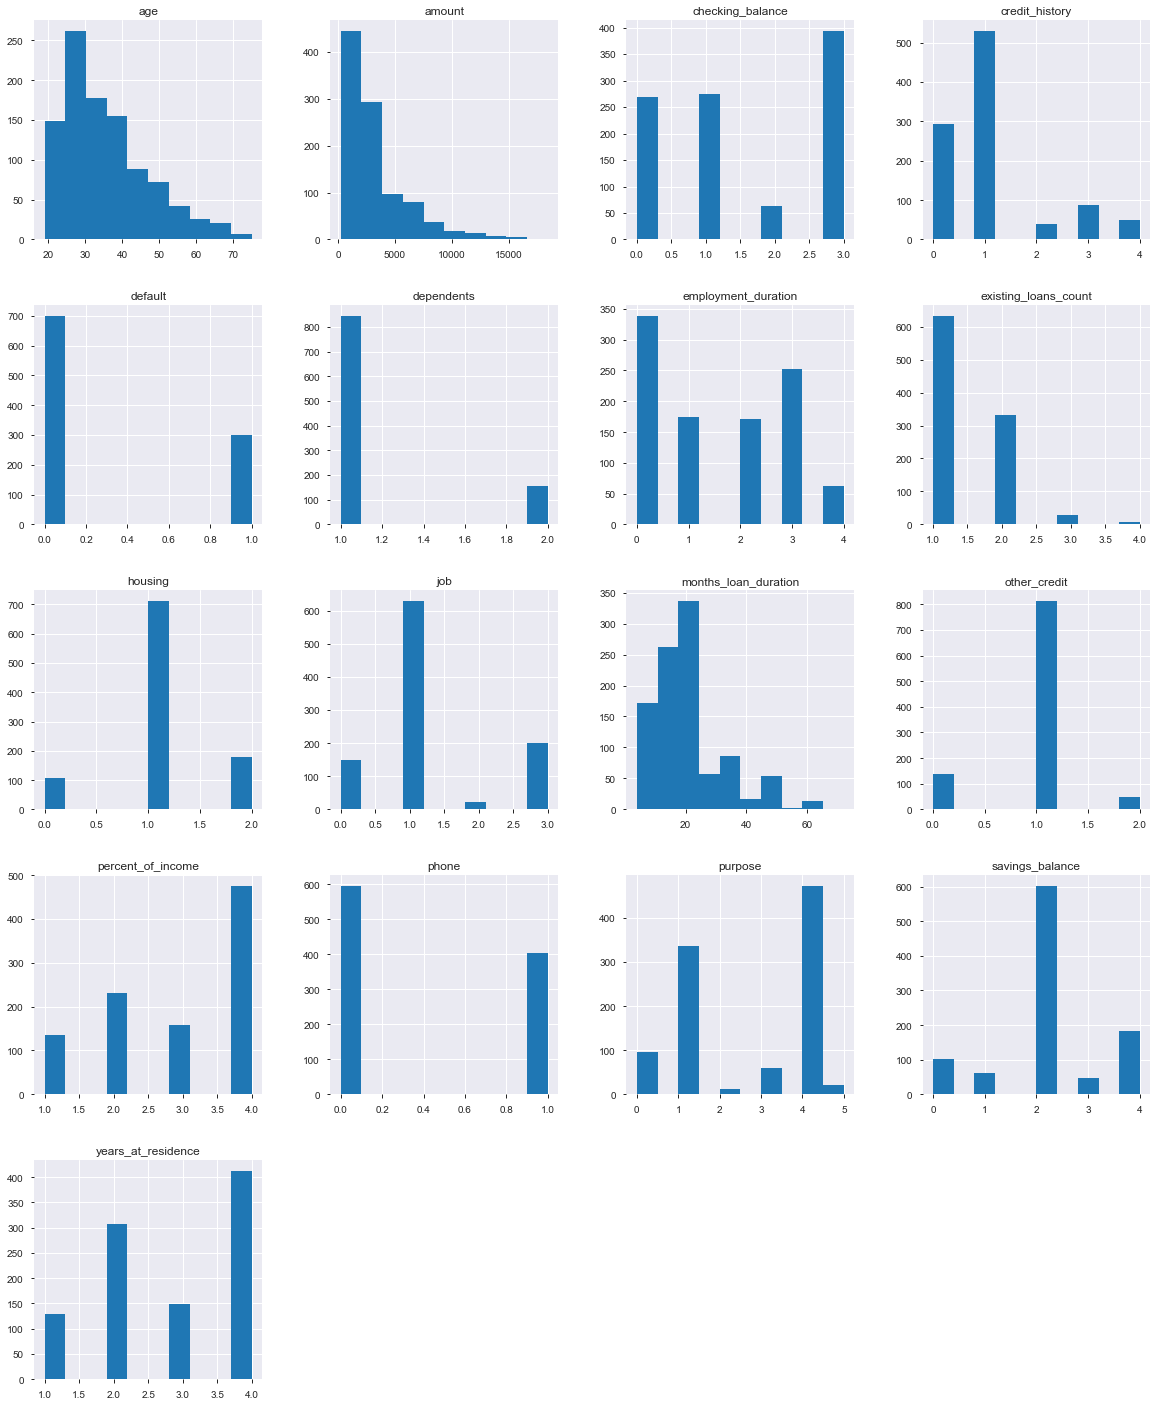

In [65]:
# the following plot represents the each feature of data in the form histogram using the matplot lib

credit_df.hist(figsize=(20,25), bins=10)

__box plot can also be used to do the univariate analysis__

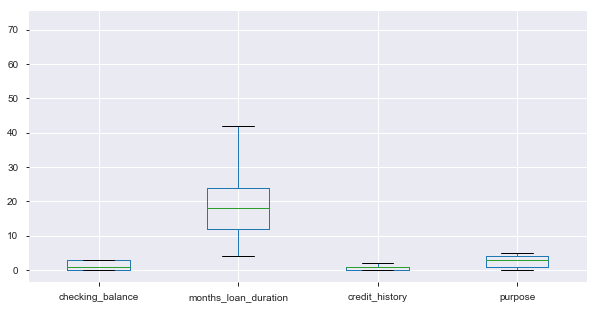

In [66]:
col_names = list(credit_df.columns)
credit_df.boxplot(column=col_names[0:4], figsize=(10,5))


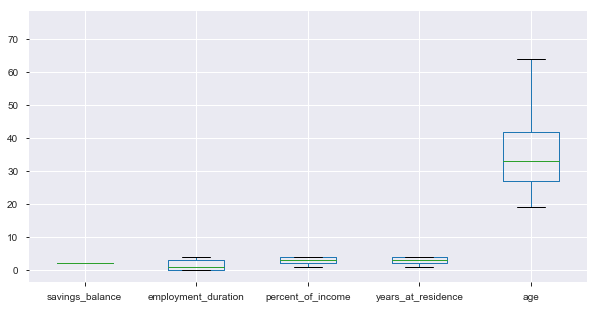

In [67]:
credit_df.boxplot(column=col_names[5:10], figsize=(10,5))

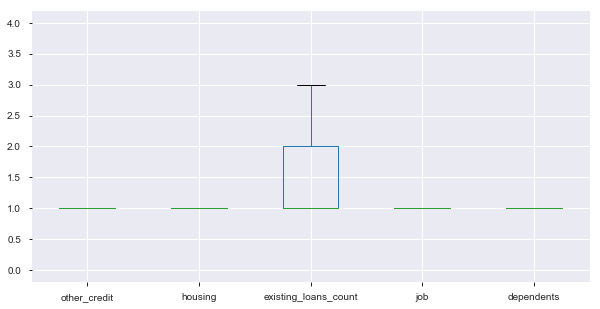

In [68]:
credit_df.boxplot(column=col_names[10:15], figsize=(10,5))

__Box plot (five number summary) gives information about min, max, median, 1st quartile and 3rd quartile. from this plot we can visualize if any outliers are present__

__on some of the columns the count plots makes more sense, for example if we want to visualize the number of defaulters and non deaulters count plot can be used__

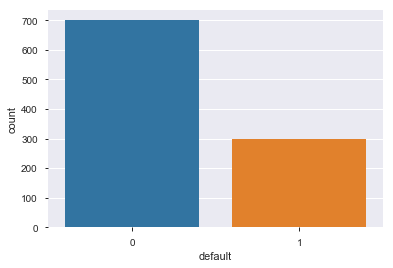

In [69]:
sns.countplot(credit_df.default)

__so from the above countplot it can be seen that data set contains more amount of good customers than that of defaulters (700:300), so the models which we train from this will learn more about non-defaulters than defaulters.But the bank would need to identify a bad customer who may default the loan. In the further steps we shall see how to manage this issue__

__KDE Kernel Density Estimation can be used to visualize the shape of the data__

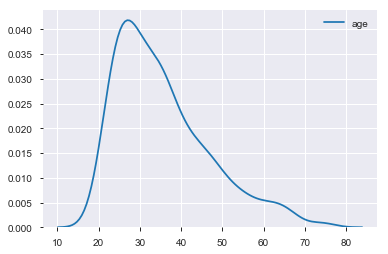

In [70]:
sns.kdeplot(credit_df['age'])

__The above are some of the univariate analysis and visualization methods__

__Multivariate analysis__

Multivariate analysis helps to understand the relation between the features/columns. It means this analysis explains the change of one variable with respect to other

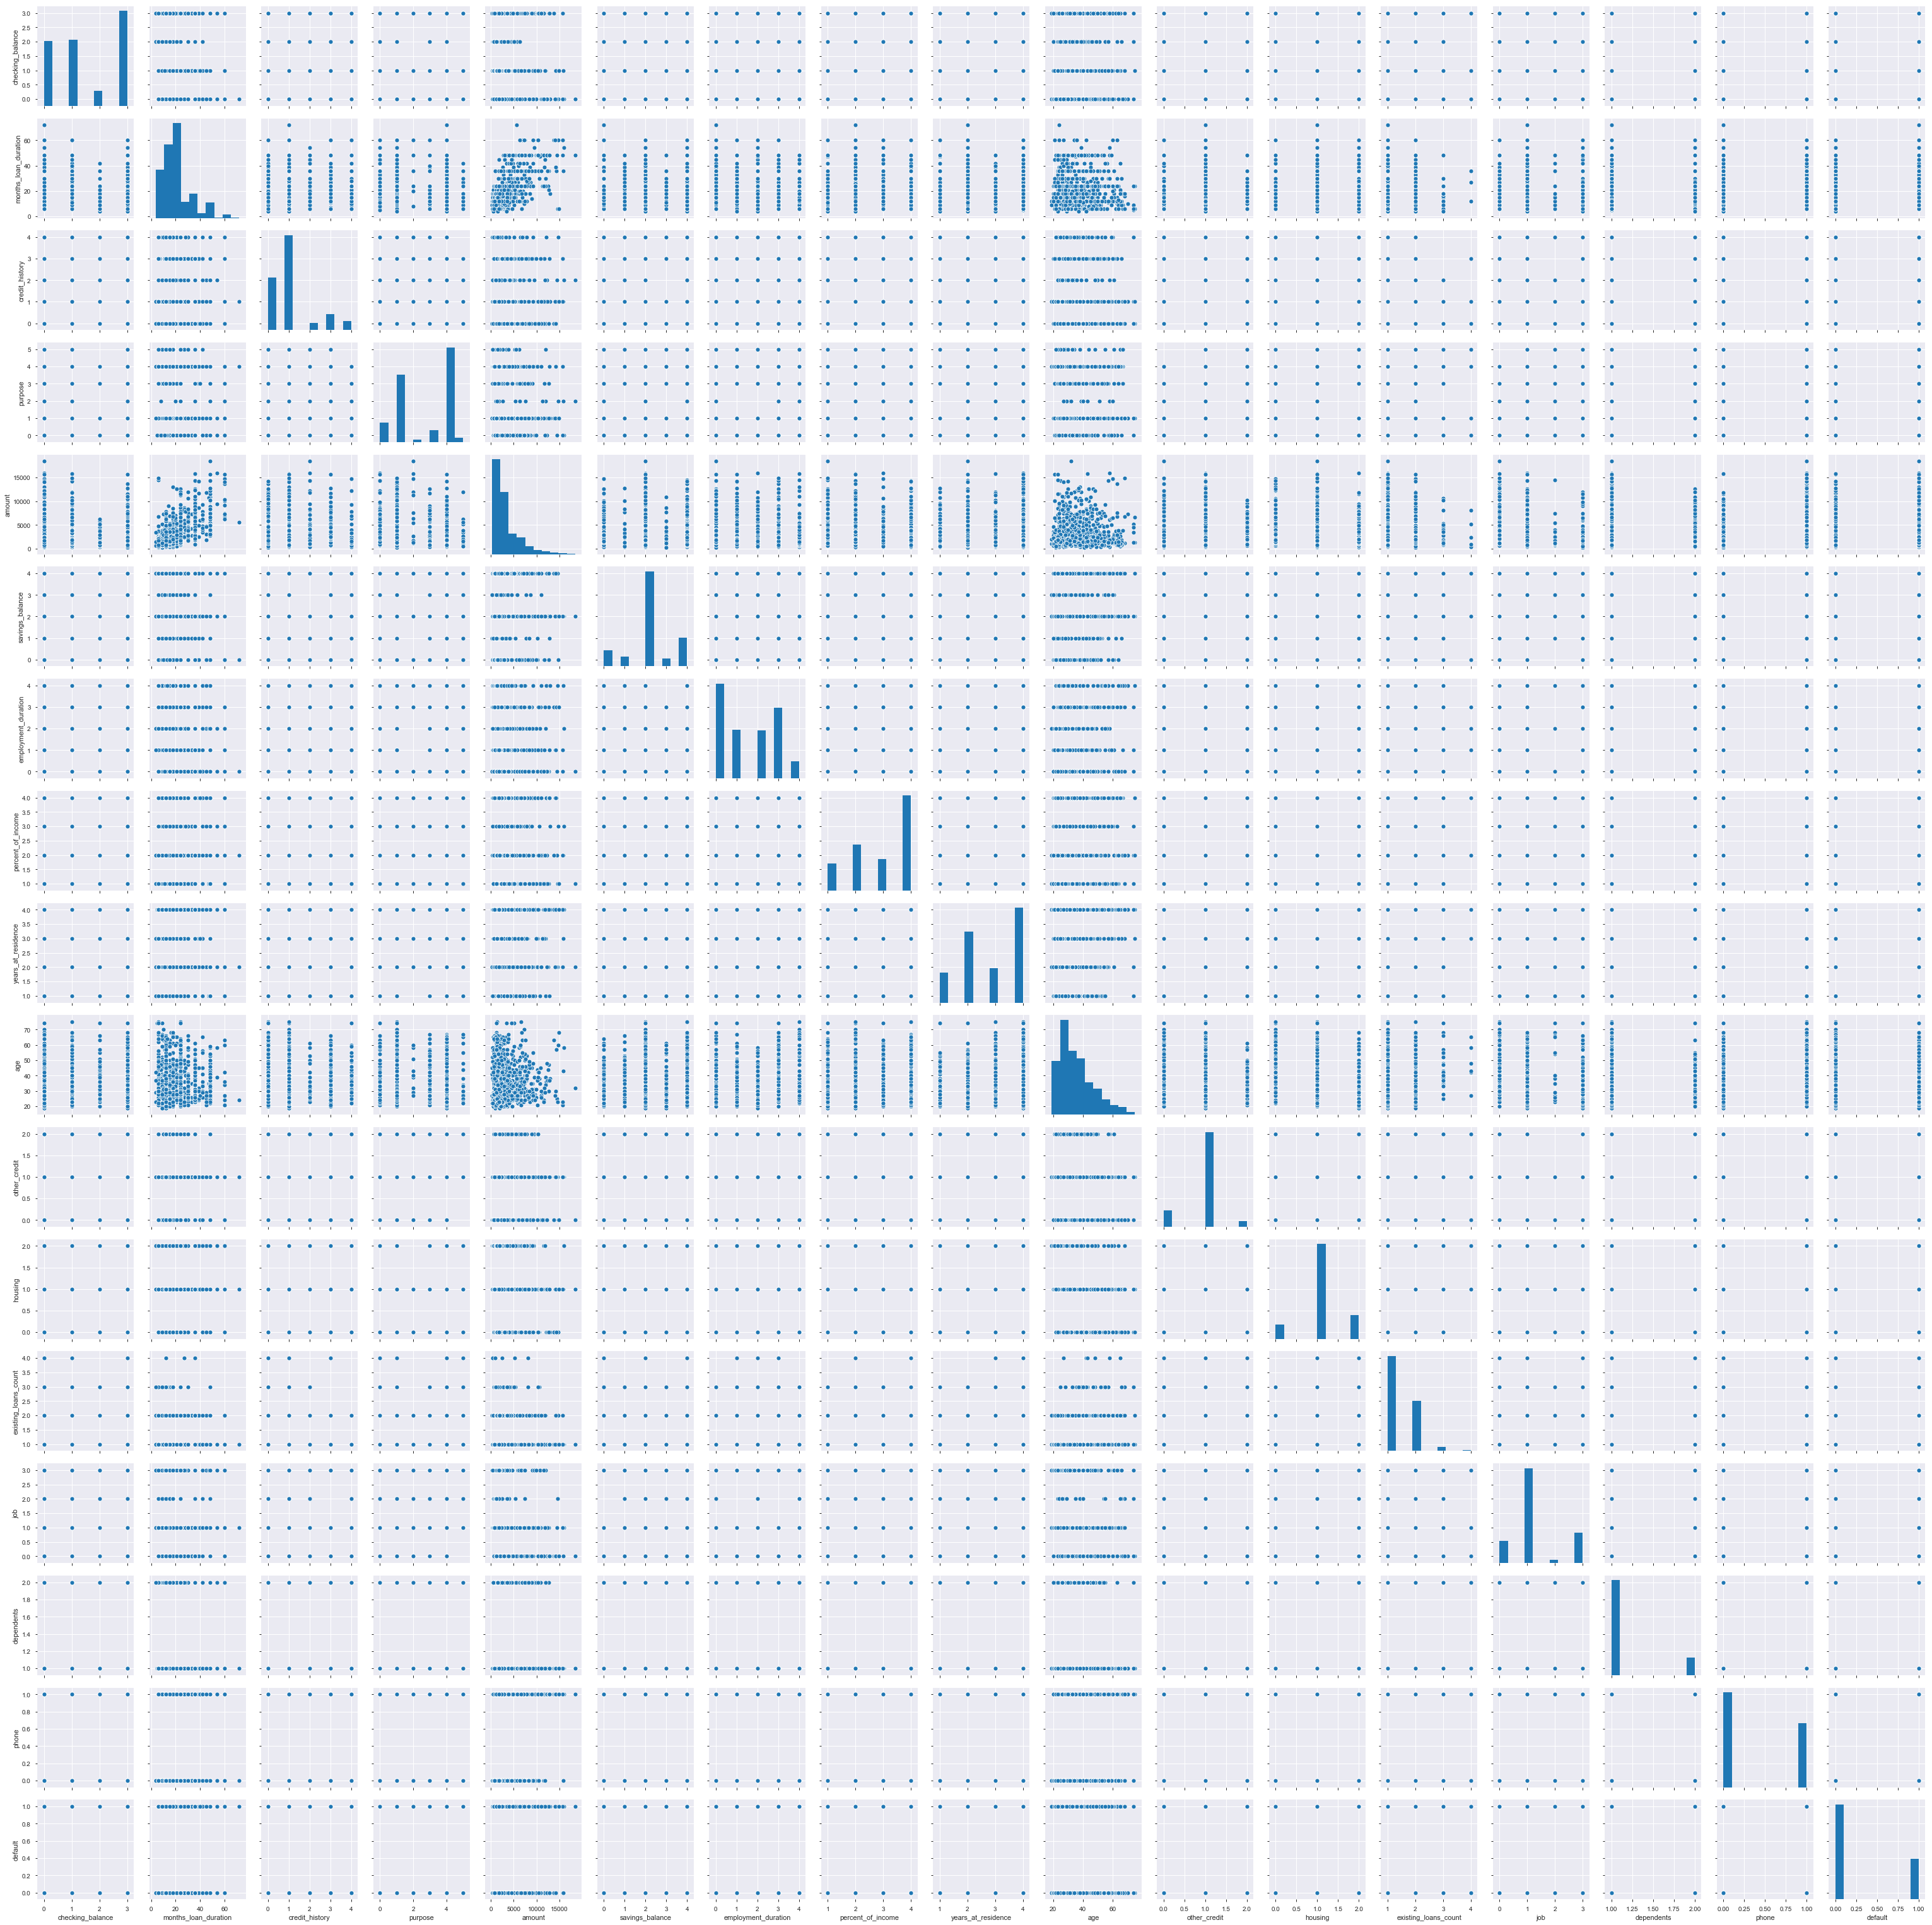

In [71]:
sns.pairplot(credit_df)

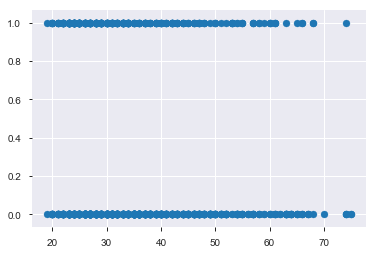

In [72]:
plt.scatter(y=credit_df.default, x=credit_df.age)

__from the above scatter plot, it is evident that irrespective of age the defaulters and non-defaulters exist__

# Splitting the data set to train and test

In [73]:
#remove the target column and store it seperately
y = credit_df.pop("default")
x = credit_df

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [74]:
#build decision tree model

decision_tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
decision_tree_model.fit(X_train,y_train)
decision_tree_model.score(X_test,y_test)


0.715